In [1]:
# import necessary packages
import numpy as np
from shapely.geometry import Point

In [2]:
# draw a coordinate of a place - Vasco Da Gama Pillar
vasco = Point(40.1276701, -3.2236304)

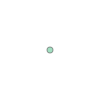

In [3]:
# Show the vasco da Gama point 
vasco

In [4]:
# Let see if we convert it to geoDataframe if it will be drawn
import pandas as pd
import geopandas as gpd

In [5]:
# Transform vasco point coordinates to a dataframe
vasco = pd.DataFrame({'Longitude': [40.1276701], 
                    'Latitude': [-3.2236304]})



In [6]:
# Convert the dataframe of vasco point to geoDataFrame
vasco_gpd = gpd.GeoDataFrame(vasco, 
                         geometry=gpd.points_from_xy(vasco.Longitude, vasco.Latitude), 
                         crs="EPSG:4326")

In [7]:
# Lets view the contents of vasco geodataframe
vasco_gpd.head()

,Longitude,Latitude,geometry
0,40.12767,-3.22363,POINT (40.12767 -3.22363)


In [8]:
# There is a geometry component!

<AxesSubplot: >

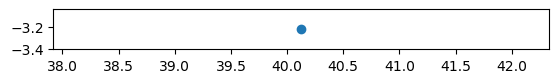

In [9]:
vasco_gpd.plot()

In [10]:
# Lets add another point, for Gedi Ruins
# Gedi ruins coordinates are: 39.9623916, -3.334307 for longitude latitude respectively

In [11]:
# Let's add the coordinates for Gedi ruins to those of Vasco
gedi = pd.DataFrame({'Longitude': [39.9623916], 
                     'Latitude': [-3.334307]})
coast_points = vasco.append(gedi)


C:\Users\gachuhi\AppData\Local\Temp\ipykernel_120\4137813128.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coast_points = vasco.append(gedi)


In [12]:
# Show coast_points attributes
coast_points.head()

,Longitude,Latitude,geometry
0,40.127670,-3.223630,POINT (40.12767 -3.22363)
0,39.962392,-3.334307,None


In [13]:
# Convert the coast_points dataframe to GeoDataframe
coast_points_gpd = gpd.GeoDataFrame(coast_points, 
                                   geometry=gpd.points_from_xy(coast_points.Longitude, coast_points.Latitude), 
                                   crs="EPSG:4326")

coast_points_gpd.head()

,Longitude,Latitude,geometry
0,40.127670,-3.223630,POINT (40.12767 -3.22363)
0,39.962392,-3.334307,POINT (39.96239 -3.33431)


<AxesSubplot: >

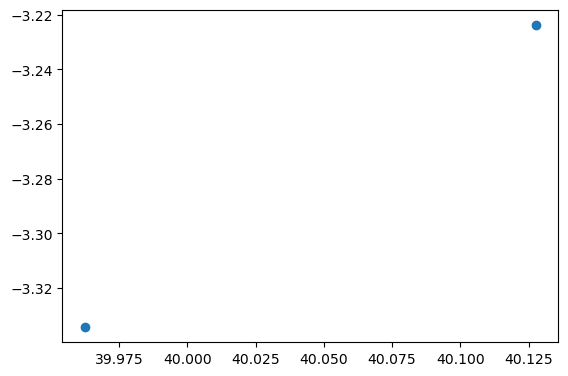

In [14]:
# Plot Distance Between Vasco da Gama and Gedi Ruins
coast_points_gpd.plot()

In [15]:
# Add names of the places to the points
coast_points_gpd.insert(loc=0, 
                        column='Names',
                        value=['Vasco da Gama Pillar', 'Gedi Ruins']
                       )
coast_points_gpd.head()

,Names,Longitude,Latitude,geometry
0,Vasco da Gama Pillar,40.127670,-3.223630,POINT (40.12767 -3.22363)
0,Gedi Ruins,39.962392,-3.334307,POINT (39.96239 -3.33431)


In [16]:
# Arrange indexing
coast_points_gpd.reset_index(inplace=True)
coast_points_gpd.head()

,index,Names,Longitude,Latitude,geometry
0,0,Vasco da Gama Pillar,40.127670,-3.223630,POINT (40.12767 -3.22363)
1,0,Gedi Ruins,39.962392,-3.334307,POINT (39.96239 -3.33431)


In [17]:
# Plot a map showing the points and their names
import matplotlib.pyplot as plt

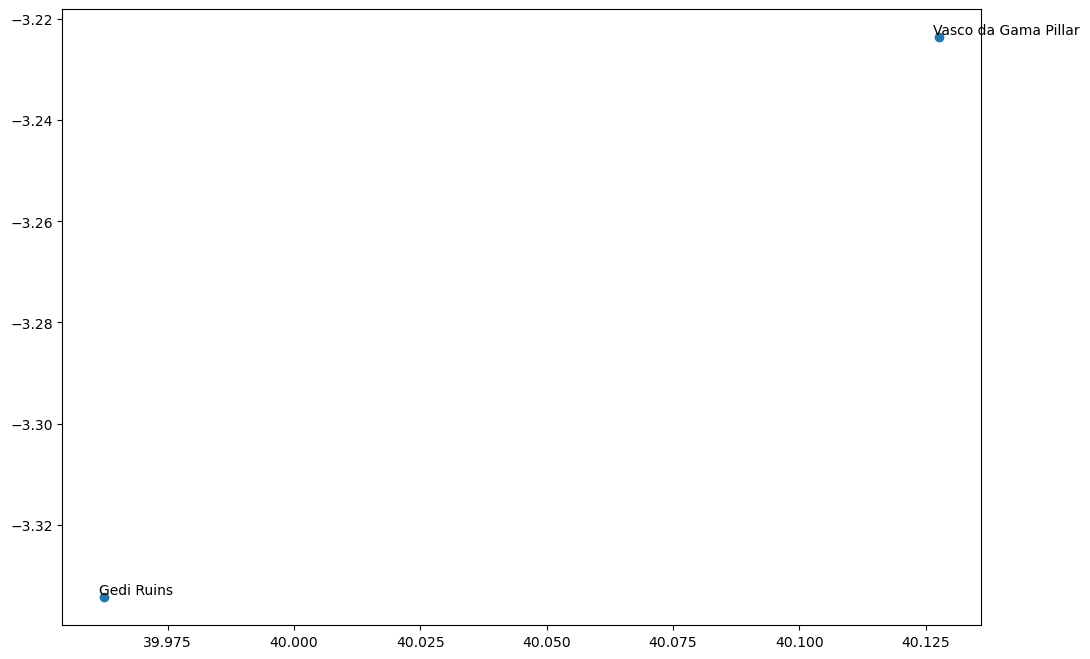

In [18]:
fig, ax = plt.subplots(figsize=(12, 8))
coast_points_map = coast_points_gpd.plot(ax=ax)

for name, lon, lat in zip(coast_points_gpd.Names, coast_points_gpd.Longitude, coast_points_gpd.Latitude):
    coast_points_map.annotate(name, xy=(lon, lat), xytext=(-4, 2), textcoords='offset points')
    

In [19]:
# Measure line distance between the two points of Vasco da Gama Pillar and Gedi ruins
# Conver to local datum
coast_points_crs = coast_points_gpd.to_crs("EPSG:32737")
coast_points_crs.crs

<Derived Projected CRS: EPSG:32737>
Name: WGS 84 / UTM zone 37S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 36°E and 42°E, southern hemisphere between 80°S and equator, onshore and offshore. Kenya. Mozambique. Tanzania.
- bounds: (36.0, -80.0, 42.0, 0.0)
Coordinate Operation:
- name: UTM zone 37S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [20]:
coast_points_crs.head()

,index,Names,Longitude,Latitude,geometry
0,0,Vasco da Gama Pillar,40.127670,-3.223630,POINT (625292.312 9643618.869)
1,0,Gedi Ruins,39.962392,-3.334307,POINT (606915.042 9631402.490)


In [21]:
from geopy import distance
point1 = (40.127670, -3.223630)  # coordinates for Vasco Da Gama Pillar
point2 = (39.962392, -3.334307)  # coordinates for Gedi Ruins

print(distance.distance(point1, point2).km)

20.639578744143794


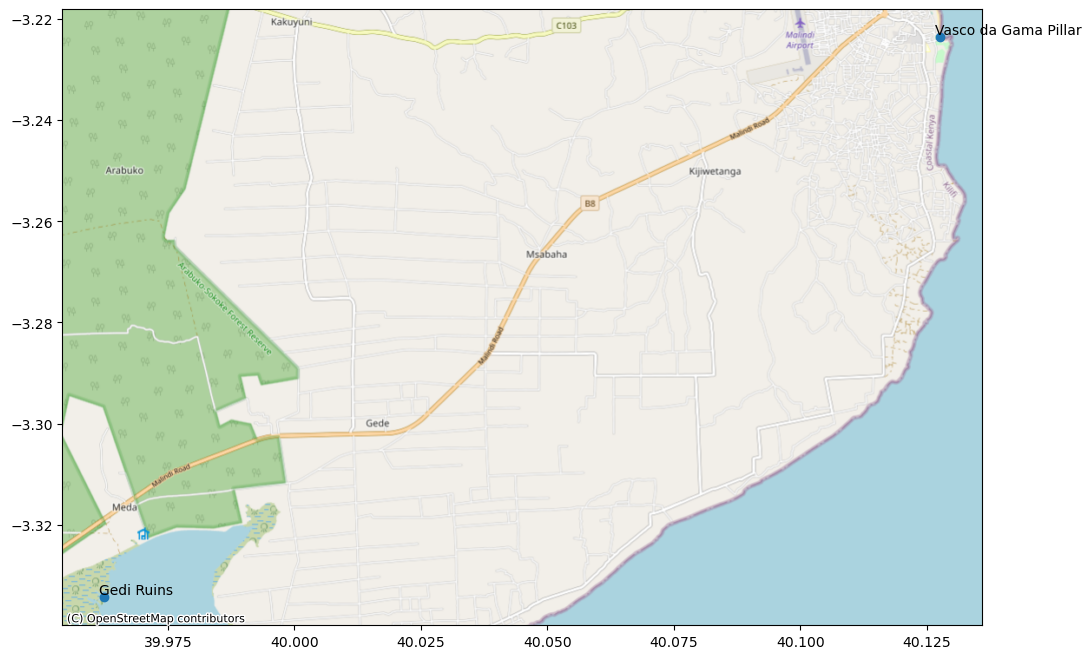

In [22]:
import contextily as cx

fig, ax = plt.subplots(figsize=(12, 8))
coast_points_map = coast_points_gpd.plot(ax=ax)

for name, lon, lat in zip(coast_points_gpd.Names, coast_points_gpd.Longitude, coast_points_gpd.Latitude):
    coast_points_map.annotate(name, xy=(lon, lat), xytext=(-4, 2), textcoords='offset points')
    
cx.add_basemap(ax, crs=coast_points_gpd.crs, source=cx.providers.OpenStreetMap.Mapnik)
plt.savefig("coastmap.png")